In [83]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [84]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [85]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2,shuffle = True)

In [87]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train).toarray()
Y_val = encoder.transform(Y_val).toarray()
Y_test = encoder.transform(Y_test).toarray()

정확도를 개선하기 위해 Regularization 방법 중 하나인 data Augmentation을 사용하였습니다.

In [88]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.05,
                             height_shift_range=0.05)
aug.fit(X_train)

In [89]:
class MobileNet(tf.keras.Model):
  def __init__(self, num_classes):
    super(MobileNet, self).__init__(name='')

    self.conv0 = tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=2)
    self.batchNorm0 = self.batchNorm1_1 = tf.keras.layers.BatchNormalization()
    self.relu0 = self.relu1_1 = tf.keras.layers.Activation('relu')
    
    self.convDw1 = tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), strides=1, padding = 'same')
    self.batchNorm1_1 = tf.keras.layers.BatchNormalization()
    self.relu1_1 = tf.keras.layers.Activation('relu')
    self.conv1 = tf.keras.layers.Conv2D(64, kernel_size=(1,1), strides=1, padding = 'same')
    self.batchNorm1_2 = tf.keras.layers.BatchNormalization()
    self.relu1_2 = tf.keras.layers.Activation('relu')
    
    self.convDw2 = tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), strides=2, padding = 'same')
    self.batchNorm2_1 = tf.keras.layers.BatchNormalization()
    self.relu2_1 = tf.keras.layers.Activation('relu')
    self.conv2 = tf.keras.layers.Conv2D(128, kernel_size=(1,1), strides=1, padding = 'same')
    self.batchNorm2_2 = tf.keras.layers.BatchNormalization()
    self.relu2_2 = tf.keras.layers.Activation('relu')
    
    self.convDw3 = tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), strides=1, padding = 'same')
    self.batchNorm3_1 = tf.keras.layers.BatchNormalization()
    self.relu3_1 = tf.keras.layers.Activation('relu')
    self.conv3 = tf.keras.layers.Conv2D(128, kernel_size=(1,1), strides=1, padding = 'same')
    self.batchNorm3_2 = tf.keras.layers.BatchNormalization()
    self.relu3_2 = tf.keras.layers.Activation('relu')
    
    self.convDw4 = tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), strides=2, padding = 'same')
    self.batchNorm4_1 = tf.keras.layers.BatchNormalization()
    self.relu4_1 = tf.keras.layers.Activation('relu')
    self.conv4 = tf.keras.layers.Conv2D(256, kernel_size=(1,1), strides=1, padding = 'same')
    self.batchNorm4_2 = tf.keras.layers.BatchNormalization()
    self.relu4_2 = tf.keras.layers.Activation('relu')
    
    self.convDw5 = tf.keras.layers.DepthwiseConv2D(kernel_size=(3,3), strides=1, padding = 'same')
    self.batchNorm5_1 = tf.keras.layers.BatchNormalization()
    self.relu5_1 = tf.keras.layers.Activation('relu')
    self.conv5 = tf.keras.layers.Conv2D(256, kernel_size=(1,1), strides=1, padding = 'same')
    self.batchNorm5_2 = tf.keras.layers.BatchNormalization()
    self.relu5_2 = tf.keras.layers.Activation('relu')
    
    self.avgPool = tf.keras.layers.GlobalAveragePooling2D()
    self.flat = tf.keras.layers.Flatten()
    self.fc = tf.keras.layers.Dense(num_classes, activation = 'softmax')

  def call(self, inputs):
    x = self.conv0(inputs)
    x = self.batchNorm0(x)
    x = self.relu0(x)

    x = self.convDw1(x)
    x = self.batchNorm1_1(x)
    x = self.relu1_1(x)
    x = self.conv1(x)
    x = self.batchNorm1_2(x)
    x = self.relu1_2(x)

    x = self.convDw2(x)
    x = self.batchNorm2_1(x)
    x = self.relu2_1(x)
    x = self.conv2(x)
    x = self.batchNorm2_2(x)
    x = self.relu2_2(x)

    x = self.convDw3(x)
    x = self.batchNorm3_1(x)
    x = self.relu3_1(x)
    x = self.conv3(x)
    x = self.batchNorm3_2(x)
    x = self.relu3_2(x)

    x = self.convDw4(x)
    x = self.batchNorm4_1(x)
    x = self.relu4_1(x)
    x = self.conv4(x)
    x = self.batchNorm4_2(x)
    x = self.relu4_2(x)

    x = self.convDw5(x)
    x = self.batchNorm5_1(x)
    x = self.relu5_1(x)
    x = self.conv5(x)
    x = self.batchNorm5_2(x)
    x = self.relu5_2(x)

    x = self.avgPool(x)
    x = self.flat(x)
    out = self.fc(x)

    return out


In [90]:
model = MobileNet(10)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

history = model.fit(aug.flow(X_train,Y_train,batch_size = 256), batch_size=256, epochs=10, validation_data=(X_val, Y_val))

Epoch 1/10
157/157 [==============================] - 28s 168ms/step - loss: 1.6087 - accuracy: 0.4107 - val_loss: 2.8592 - val_accuracy: 0.1003
Epoch 2/10
157/157 [==============================] - 27s 173ms/step - loss: 1.2807 - accuracy: 0.5380 - val_loss: 3.4283 - val_accuracy: 0.1090
Epoch 3/10
157/157 [==============================] - 27s 169ms/step - loss: 1.1475 - accuracy: 0.5879 - val_loss: 3.9147 - val_accuracy: 0.1046
Epoch 4/10
157/157 [==============================] - 26s 166ms/step - loss: 1.0558 - accuracy: 0.6235 - val_loss: 1.2200 - val_accuracy: 0.5673
Epoch 5/10
157/157 [==============================] - 26s 168ms/step - loss: 0.9839 - accuracy: 0.6520 - val_loss: 1.1016 - val_accuracy: 0.6092
Epoch 6/10
157/157 [==============================] - 26s 168ms/step - loss: 0.9241 - accuracy: 0.6728 - val_loss: 1.1407 - val_accuracy: 0.6006
Epoch 7/10
157/157 [==============================] - 26s 163ms/step - loss: 0.8737 - accuracy: 0.6892 - val_loss: 1.1993 - val_ac

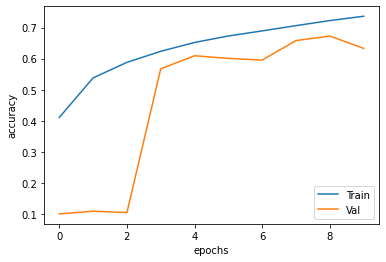

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()


In [92]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.1039 - accuracy: 0.6356


[1.103898525238037, 0.6355999708175659]